# Input Data
Analyze inputs: data types.

In [56]:
import pandas as pd

from db.database import connect

In [57]:
with connect() as session:
    repository_files = pd.read_sql_table("repository_files", session.connection())
    print('Total of Repository Files:', len(repository_files))
    display(repository_files)

Total of Repository Files: 3703


,id,repository_id,path,size,skip,had_surrogates
0,1,1,,0,0,False
1,2,1,notebooks/,0,0,False
2,3,1,notebooks/05.09-Principal-Component-Analysis.i...,578683,0,False
3,4,1,notebooks/01.05-IPython-And-Shell-Commands.ipynb,11580,0,False
4,5,1,notebooks/03.13-Further-Resources.ipynb,5059,0,False
...,...,...,...,...,...,...
3698,3699,10,assets/rnn.jpeg,68679,0,False
3699,3700,10,assets/sql-join.PNG,35414,0,False
3700,3701,10,assets/lr.png,43790,0,False
3701,3702,10,assets/autoencoder.png,49621,0,False


In [58]:
def get_file_extension(path):
    if "." in path and path[-1] != "/":
        return path.split(".")[-1]

repository_files["file_extension"] = repository_files.\
    apply(lambda row : get_file_extension(row[2]), axis=1)
display(repository_files)

,id,repository_id,path,size,skip,had_surrogates,file_extension
0,1,1,,0,0,False,None
1,2,1,notebooks/,0,0,False,None
2,3,1,notebooks/05.09-Principal-Component-Analysis.i...,578683,0,False,ipynb
3,4,1,notebooks/01.05-IPython-And-Shell-Commands.ipynb,11580,0,False,ipynb
4,5,1,notebooks/03.13-Further-Resources.ipynb,5059,0,False,ipynb
...,...,...,...,...,...,...,...
3698,3699,10,assets/rnn.jpeg,68679,0,False,jpeg
3699,3700,10,assets/sql-join.PNG,35414,0,False,PNG
3700,3701,10,assets/lr.png,43790,0,False,png
3701,3702,10,assets/autoencoder.png,49621,0,False,png


In [59]:
def drop_non_data_file(file_extension):
    data_type = ['csv', 'tsv', 'psv',  'txt', 'tab', 'xlsx',
                 'json', 'geojson', 'zip', 'pkl', 'sas', 'dta',
                 'hdf5']
    if file_extension in data_type:
        return file_extension

repository_files["data_extension"] = repository_files.\
    apply(lambda row : drop_non_data_file(row[6]),axis=1)

In [60]:
data_files_extensions = repository_files.data_extension\
    .value_counts(dropna=True).rename_axis('Data Files Extensions')\
    .to_frame('Counts')
display(data_files_extensions)

,Counts
Data Files Extensions,
csv,135
txt,75
json,55
xlsx,5
tsv,2


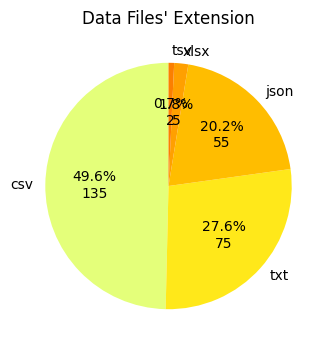

In [63]:
data_files_extensions.plot\
    .pie(title="Data Files' Extension", figsize=(15,4), cmap="Wistia",y='Counts',
         ylabel='',autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(
                          prct_value,
                          sum(data_files_extensions.Counts)*prct_value/100
                         )
                  ),
         shadow=False, startangle=90).get_legend().remove()